## Sınıflandırma (Classification)

### k-NN Algoritması (En yakın Komşular) (Nearest Neighbours)

In [18]:
# Bir e-posta spam/spam değil sınıflandırması
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import GridSearchCV

In [9]:
trn = pd.read_csv("https://raw.githubusercontent.com/yasarkucukefe/YBS_405/main/data/spambase_trn.csv")

In [10]:
trn.head()

,X0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X48,X49,X50,X51,X52,X53,X54,X55,X56,y
0,0.0,0.17,0.00,0.0,0.0,0.0,0.17,0.52,0.00,0.17,...,0.029,0.147,0.029,0.117,0.058,0.235,3.521,39,419,1
1,0.7,0.00,1.06,0.0,0.0,0.0,0.00,1.41,0.35,0.35,...,0.000,0.117,0.000,0.353,0.000,0.000,1.209,13,196,1
2,0.0,0.00,1.58,0.0,0.0,0.0,0.00,0.00,0.00,0.00,...,0.000,0.149,0.000,0.149,0.000,0.000,1.482,10,43,0
3,0.0,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,2.56,...,0.000,0.194,0.194,0.000,0.000,0.000,3.631,17,69,0
4,0.0,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,...,0.000,0.000,0.000,0.000,0.000,0.000,1.000,1,3,0


In [12]:
X_trn = trn.filter(regex='\d')
y_trn = trn.y

In [13]:
tst = pd.read_csv("https://raw.githubusercontent.com/yasarkucukefe/YBS_405/main/data/spambase_tst.csv")
X_tst = tst.filter(regex='\d')
y_tst = tst.y

In [14]:
X_trn.shape

(3220, 57)

In [15]:
X_tst.shape

(1381, 57)

In [16]:
spam =["Spam değil","Spam"]

In [17]:

knn = KNeighborsClassifier()
# Parametre seçimi
param = range(3,15,2)
#GridSearchCV
grid = GridSearchCV(knn, {'n_neighbors': param})
#En iyi parametre
eniyi_knn = grid.fit(X_trn, y_trn).best_estimator_
eniyi_knn.get_params

In [19]:
# Model oluştur
knn = KNeighborsClassifier() 

In [21]:
# Parametre seçimi
param = range(3,15,2)

In [22]:
#GridSearchCV
grid = GridSearchCV(knn, {'n_neighbors': param})

In [23]:
#En iyi parametre
eniyi_knn = grid.fit(X_trn, y_trn).best_estimator_

In [25]:
eniyi_knn.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 3,
 'p': 2,
 'weights': 'uniform'}

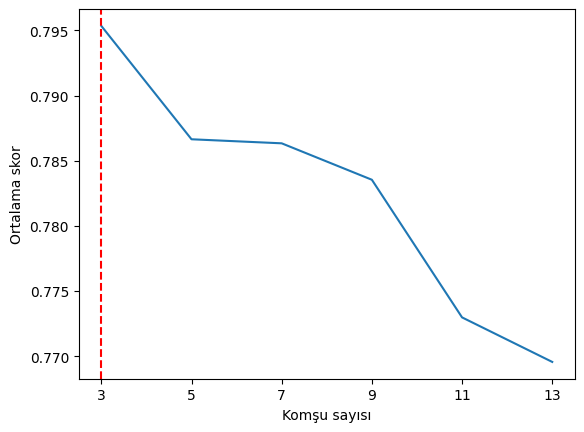

In [26]:
# Doğruluk grafiği
plt.plot(param, grid.cv_results_['mean_test_score'])
plt.xticks(param)
plt.ylabel("Ortalama skor")
plt.xlabel("Komşu sayısı")
# en iyi paramtere
plt.axvline(x=eniyi_knn.n_neighbors, color='r', ls='--')

In [27]:
# Eğitim seti ile doğruluk oranı
eniyi_knn.score(X_trn, y_trn)

0.8950310559006212

In [28]:
# Test seti ile doğruluk oranı
eniyi_knn.score(X_tst, y_tst)

0.8110065170166546

C:\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


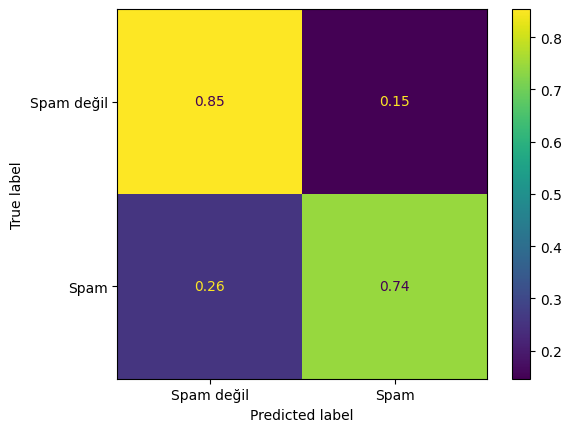

In [33]:
# Confusition matrix
# https://en.wikipedia.org/wiki/Confusion_matrix
plot_confusion_matrix(eniyi_knn, X_tst, y_tst, display_labels=spam, normalize='true')

## Naive Bayes Sınıflandırması



In [34]:
# https://en.wikipedia.org/wiki/Naive_Bayes_classifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import plot_confusion_matrix

In [35]:
nb = GaussianNB()

In [37]:
nb.fit(X_trn, y_trn)

GaussianNB()

In [38]:
nb.score(X_trn, y_trn)

0.8220496894409938

In [39]:
nb.score(X_tst, y_tst)

0.8204199855177408

C:\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


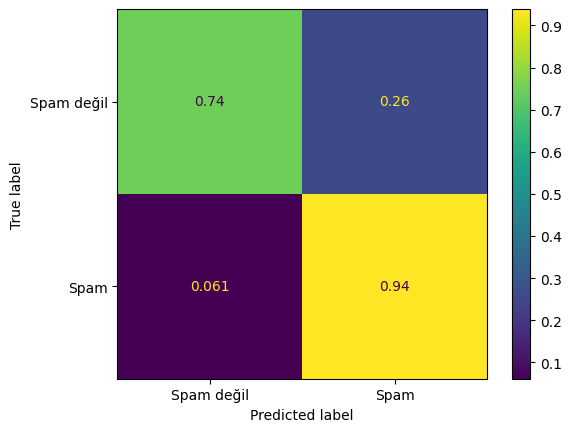

In [40]:
plot_confusion_matrix(nb, X_tst, y_tst, display_labels=spam, normalize='true')

## Karar Ağaçları


In [41]:
# https://ceng.cu.edu.tr/uorhan/DersNotu/Ders03.pdf
# https://erdincuzun.com/makine_ogrenmesi/decision-tree-karar-agaci-id3-algoritmasi-classification-siniflama/

In [42]:
from sklearn.tree import DecisionTreeClassifier

In [43]:
# Nesne oluştur
dt = DecisionTreeClassifier()

In [44]:
# Model fit
dt.fit(X_trn, y_trn)

DecisionTreeClassifier()

C:\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


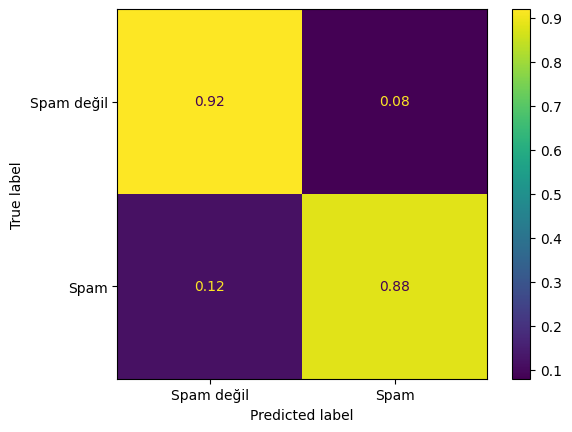

In [45]:
plot_confusion_matrix(dt, X_tst, y_tst, display_labels=spam, normalize='true')

C:\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


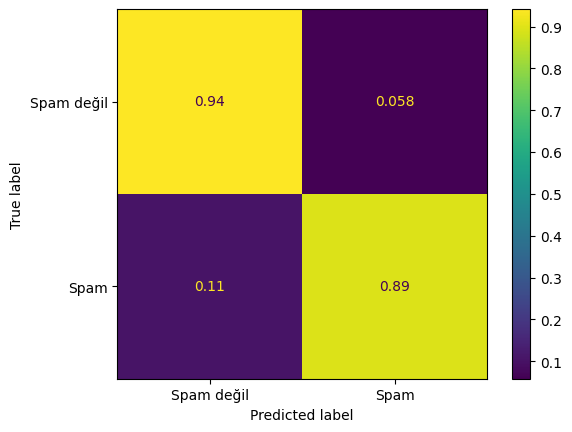

In [47]:
# Grid search ile uygun parametrelerin bulunması
dt2 = DecisionTreeClassifier(criterion='entropy').fit(X_trn, y_trn)
plot_confusion_matrix(dt2, X_tst, y_tst, display_labels=spam, normalize='true')

In [52]:
# Grid search
dt3 = DecisionTreeClassifier()

grid = GridSearchCV(dt3, {'criterion':['gini','enptropy'], 'max_leaf_nodes':list(range(6,50,2))})

grid.fit(X_trn, y_trn)

eniyi_dt = grid.best_estimator_

eniyi_dt.get_params()


C:\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
110 fits failed out of a total of 220.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
110 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Python\Python310\lib\site-packages\sklearn\tree\_classes.py", line 969, in fit
    super().fit(
  File "C:\Python\Python310\lib\site-packages\sklearn\tree\_classes.py", line 390, in fit
    criterion = CRITERIA_CLF[self.criterion](
KeyError: 'enptropy'

  warnings.warn(some_fits_failed_message, FitFailedW

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': 38,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

C:\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


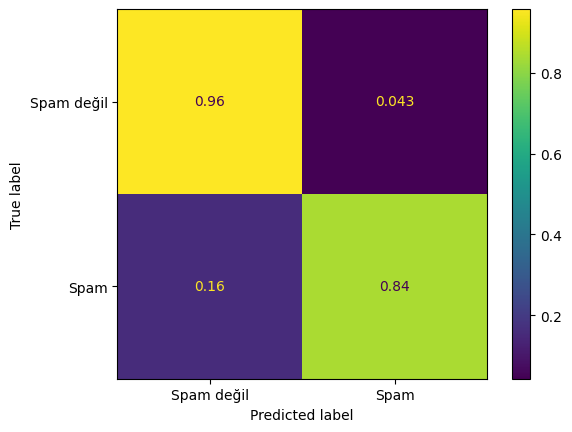

In [55]:
plot_confusion_matrix(eniyi_dt, X_tst, y_tst, display_labels=spam, normalize='true')

In [56]:
from sklearn.tree import plot_tree

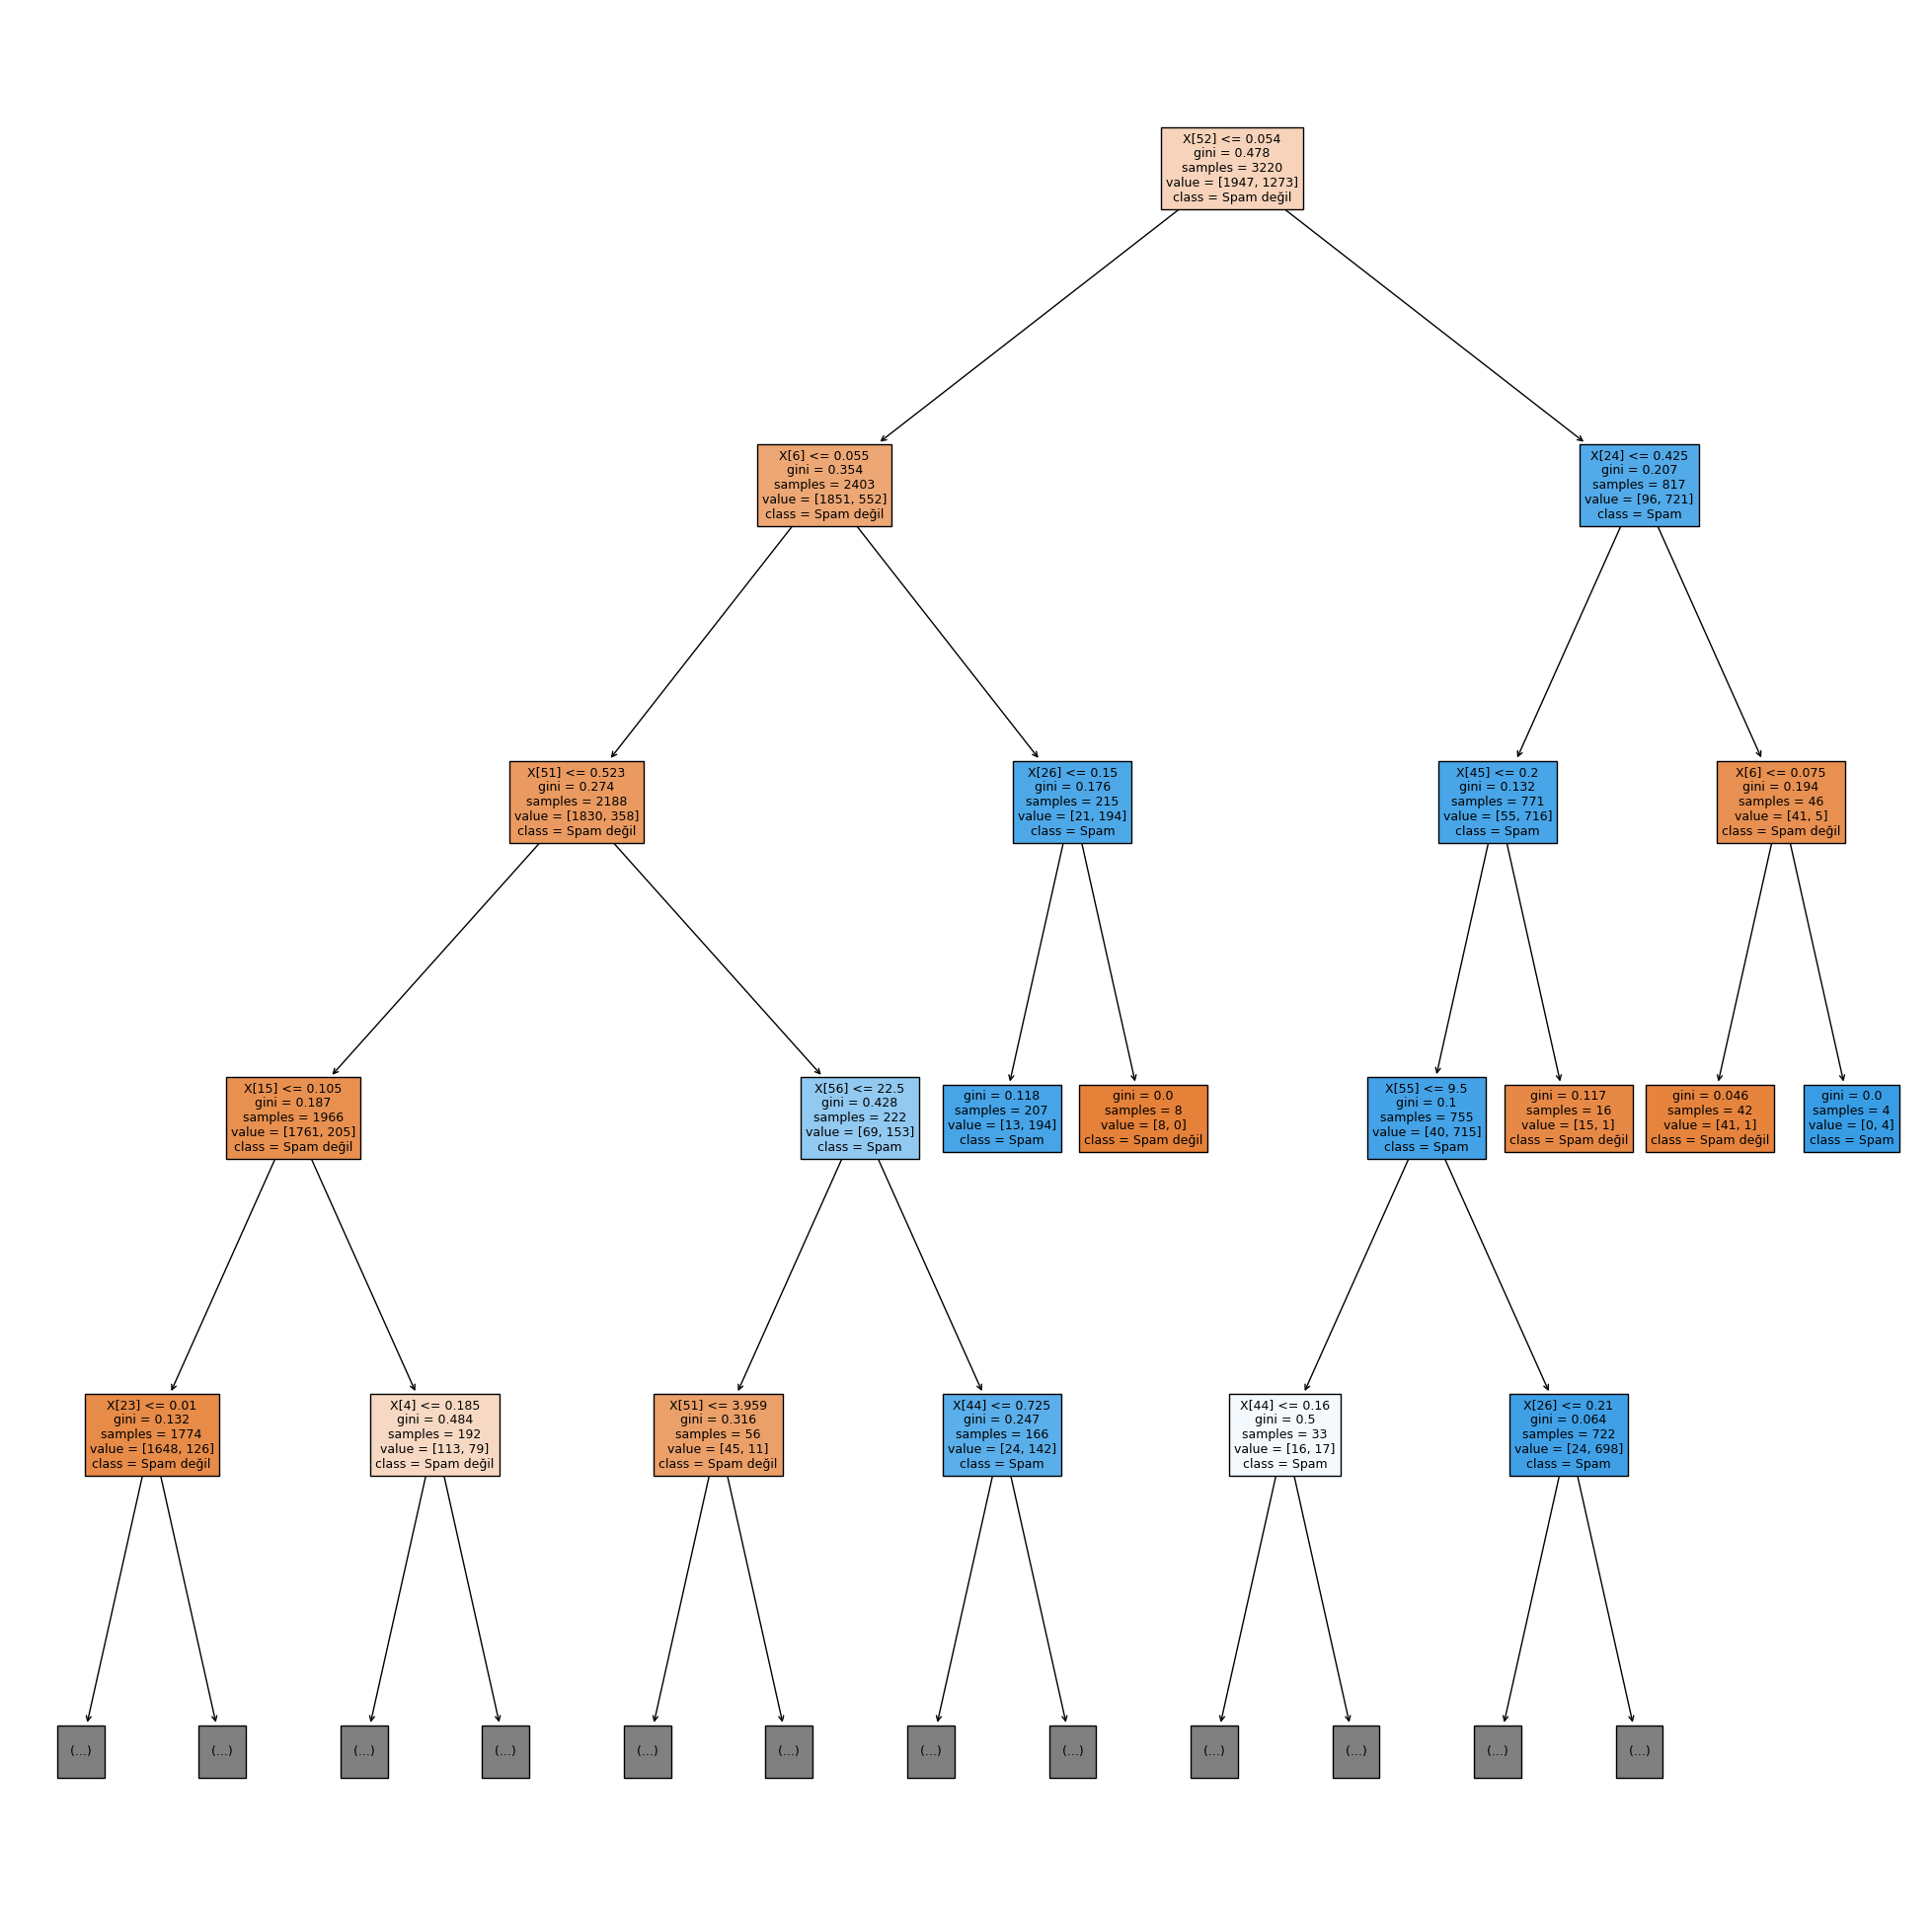

In [57]:
fig = plt.figure(figsize=(25,25))
t = plot_tree(eniyi_dt, class_names=spam, max_depth=4, filled=True)